# Hello, Classification

Examples from: [Classification with scikit](https://www.datarobot.com/blog/classification-with-scikit-learn/)

In [3]:
import pandas as pd
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [13]:
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\ibarcan\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
# downsample negative cases -- there are many more negatives than positives
indices = np.where(df.default == 'No')[0]
rng = np.random.RandomState(13)
rng.shuffle(indices)
n_pos = (df.default == 'Yes').sum()
df = df.drop(df.index[indices[n_pos:]])

On the left you can see a scatter plot where fraudulent cases are red dots and non-fraudulent cases are blue dots. A good separation seems to be a vertical line at around a balance of 1400 as indicated by the boxplots below.

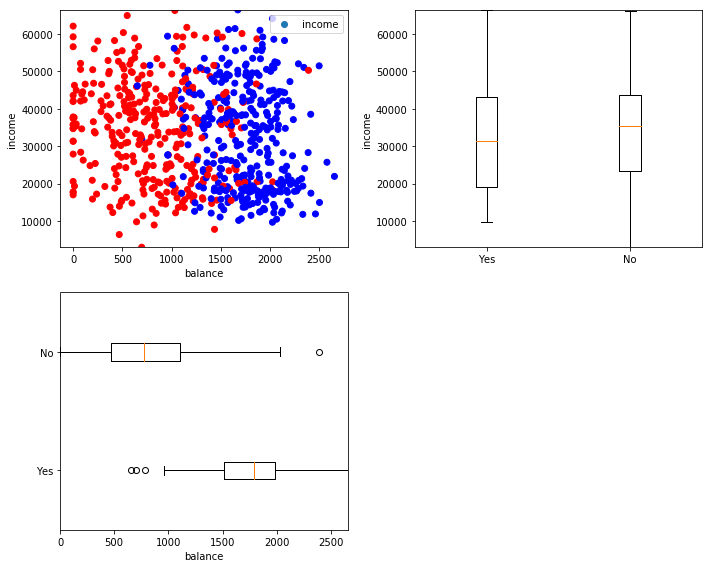

In [17]:
# setup figure
plt.figure(figsize=(10, 8))

# scatter plot of balance (x) and income (y)
ax1 = plt.subplot(221)
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax1.scatter(df.balance, df.income, c=(df.default == 'Yes'), cmap = cm_bright)
ax1.set_ylim((df.income.min(), df.income.max()))
ax1.set_xlabel('balance')
ax1.set_ylabel('income')
ax1.legend(loc = 'upper right')

# box plots for income
ax2 = plt.subplot(222)
ax2.boxplot([df.income[df.default == 'Yes'], df.income[df.default == 'No']])
ax2.set_ylim((df.income.min(), df.income.max()))
ax2.set_xticklabels(('Yes', 'No'))
ax2.set_ylabel('income')

# box plots for balance
ax3 = plt.subplot(223)
ax3.boxplot([df.balance[df.default == 'Yes'], df.balance[df.default == 'No']], vert=0)
ax3.set_xlim((df.balance.min(), df.balance.max()))
ax3.set_yticklabels(('Yes', 'No'))
ax3.set_xlabel('balance')
plt.tight_layout()